# Проект для «Викишоп» с BERT

### "инструкция":

<div style="border:solid Chocolate 2px; padding: 40px">
    
для того, чтобы код отработал сверху вниз быстро и без ожидания всех подсчётов можно скачать [вот этот файл](https://drive.google.com/file/d/1HTFYHqc9KNXV7fWo5GgMjHQWyz5DN4wo/view?usp=sharing) по ссылке, положить его в директорию запуска скрипта и сразу же сохранить его в переменную, запустив следующую ячейку:
    
</div>

In [1]:
import os
import pickle

def save_or_download_file(variable_name, file_name, folder_name='project_files', download=False):
    """функция сохраняет/загружает файлы локально"""
    
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    if download:
        with open(os.path.join(folder_name, f'{file_name}.pickle'), 'rb') as f:
            variable_name = pickle.load(f)
        return variable_name
    else:
        with open(os.path.join(folder_name, f'{file_name}.pickle'), 'wb') as f:
            pickle.dump(variable_name, f) 

pipeline_and_predicts_list = save_or_download_file(None, 'pipeline_and_predicts_list', download=True)

<div style="border:solid Chocolate 2px; padding: 40px">

Это необохомо потому, что файл оказался крупноват, он чуть больше 200 мегабайт. В нём в списке лежат кортежи с названиями методов, при помощи которых были обработаны данные (TF-IDF или эмбеддинг), с названиями алгоритмов, обученные пайплайны с подобранными при помощи RandomizedSearchCV гиперпараметрами и вектора с предсказаниями на тренировочной выборке вот в таком виде:

        [('embeddings',
          'LogisticRegression',
          Pipeline(steps=[('classifier',
                           LogisticRegression(C=1, class_weight={0: 1, 1: 4},
                                              intercept_scaling=1.5, tol=1e-06))]),
          array([0, 0, 0, ..., 0, 0, 0], dtype=int64)),
         ('tfidf',
          'LogisticRegression',
          Pipeline(steps=[('classifier',
                           LogisticRegression(C=1, class_weight={0: 1, 1: 4},
                                              intercept_scaling=1.5, tol=1e-06))]),
          array([1, 0, 0, ..., 0, 0, 0], dtype=int64)),
          
Гугл считает такой большой и странный файл потенциально опасным и не даёт его просто так взять и скачать. С остальными же файлами при скачивании никаких проблем не возникает, специально их скачивать не нужно, но, если что, вот ссылки и на них:

- изначальная разбивка: 
  - [X_train](https://drive.google.com/file/d/1jndUtDnaknCJ0HsBLvDLrE3NSgff7bIF/view?usp=sharing), [X_test](https://drive.google.com/file/d/1XE5LkLOhYr-W5iRhgQcFVRDZPzegu8xL/view?usp=sharing), [y_train](https://drive.google.com/file/d/1kvAVXTifMHmuULirwpMfG-uf9zF0vJRj/view?usp=sharing), [y_test](https://drive.google.com/file/d/1qEEYVM_EE_U7oP7L-oB2ZdnDaMohH4wN/view?usp=sharing)
- TF-IDF: 
  - [X_train_tfidf](https://drive.google.com/file/d/1XQJWnzs24kocYeHIL_OO96a_LHtSIG3b/view?usp=sharing), [X_test_tfidf](https://drive.google.com/file/d/1rTuvM2fcR1RMuOWrxug1rMiiV3lwj7K1/view?usp=sharing)
- эмбеддинги: 
  - [X_temp_ebm](https://drive.google.com/file/d/1AD_8FPO6S3O_ieRjWfG0irDWEJTaytQ3/view?usp=sharing), [X_train_emb](https://drive.google.com/file/d/1w-Z1cgjQ69bn9JVl1S8k9u00r9G1Cio0/view?usp=sharing), [y_emb](https://drive.google.com/file/d/1Rhep4mrLqex_fc6J2Tzs02mYamg0ZTjo/view?usp=sharing)


В силу долгой обработки матриц все остальные готовые файлы в работе достаются с помощью самописной функции ```download_from_link``` и сразу загружаются в свои переменные (кроме лемматизации, так как она делается быстрее, чем скачивается). Если же что-то пойдёт со скачиванием не так (не должно, но вдруг), всегда есть прямые ссылки на скачивание и функция ```save_or_download_file```, которая локальные файлы подгружает аналогично тому, как был загружен список *pipeline_and_predicts_list*

Но вообще в этом нет необходимости, так как я по мере следования кода раскомментировал все строки, в которых в свои переменные по логике следования работы подгружаются готовые данные из Google Drive. А слишком долгие части кода по обсчёту данных, наоборот, закомментировал. 

</div>

_____

_____

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах, т.е. клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. А нам нужно для такого инструмента создать Machine Learning-модель бинарной классификации. Мы обучим модель классифицировать комментарии и находить среди них негативные. 

Для реализации идеи в наше распоряжение интернет-магазин «Викишоп» предоставил набор данных с разметкой о токсичности правок `toxic_comments.csv`, в котором есть 2 столбца:
1. *text* - в нём содержится текст комментария
2. *toxic* — бинарный флаг, целевой признак

В качестве критерия успешности созданной нами модели будет выступать метрика ```F1```: 

$$F1 = \frac{2 \cdot precision \cdot recall}{precision + recall}$$

Метрика ```F1``` является гармоническим средним между точностью ```precision``` и полнотой ```recall```. 
  - *точность* - это доля правильно предсказанных положительных классов от общего числа предсказанных положительных классов. 
  - *полнота* - это доля правильно предсказанных положительных классов от общего числа истинных положительных классов.

```F1``` учитывает как точность, так и полноту, что делает её более универсальной метрикой, чем точность или полнота в отдельности. ```F1``` принимает значения от 0 до 1 и чем ближе значение метрики к единице, тем лучше качество классификации. Наша модель должна возвращать значение ```F1``` не ниже 0.75

Для решения поставленной задачи будем придерживатья следующих шагов:

1. Подготовим данные для машинного обучения разными способами

2. Создадим несколько видов ML-моделей, основанных на разных алгоритмах

3. Выберем лучший алгоритм по метрике F1, на его основе по отложенной выборке сформируем предсказание и посчитаем контрольную метрику

4. Подведём итог проделанной работе

_____

## Подготовка

Импортируем все необходимые для работы библиотеки и модули:

In [2]:
import gc
import os
import pickle
import requests
import string
import transformers

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords as stop_w
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from sklearn.decomposition import TruncatedSVD
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_curve, auc, f1_score, confusion_matrix, 
                             precision_score, recall_score)
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

import transformers

from xgboost import XGBClassifier

import torch

from tqdm import notebook
from tqdm.notebook import tqdm
tqdm.pandas()       # для работы с apply()

import warnings
warnings.filterwarnings('ignore')  # для итераций на LogisticRegression

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

pd.set_option('max_colwidth', 120)
RANDOM_STATE = 42

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mysha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mysha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mysha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mysha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Техническая часть работы - все классы, функции и пр. рабочие части кода соберём в одном месте здесь наверху, так общий код исследования будет выглядеть аккуратнее:

In [3]:
def preprocess_and_tokenize_text(text, cache=None):
    """
    функция для предобработки и токенизации текста на английском языке. 
    Удаляет стоп-слова, цифры и знаки пунктуации, переводит слова в нижний регистр, 
    разбивает слова на токены, добавляет к ним POS-тег, лемматизирует с помощью WordNetLemmatizer.
    Если при вызове функции был передан cache, то результаты лемматизации сохраняются в кэше, 
    чтобы повторная обработка одного и того же слова не требовала лишних вычислений.
    Возвращает функция список уникальных лемм
    """
    
    # если пришло что-то не то
    if not isinstance(text, str) or text == '':
        return []

    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # удаление цифр, пунктуации и приведение к нижнему регистру
    text = text.translate(str.maketrans('', '', string.digits + string.punctuation)).lower()

    # токенизация
    tokens = word_tokenize(text)

    # Определяем соответствие между тегами частей речи NLTK и WordNet
    tag_map = {'N': wordnet.NOUN,
               'V': wordnet.VERB,
               'R': wordnet.ADV,
               'J': wordnet.ADJ}
    # лемматизация токенов с использованием кэша и учетом post_tag
    words_lem, added_words = [], set()
    for token in tokens:
        if len(token) > 1 and token not in stop_words:
            if cache is not None and token in cache:
                lem_token = cache[token]
            else:
                # Определение post_tag для слова
                post_tag = nltk.pos_tag([token])[0][1]
                # Приводим тег части речи к формату WordNet
                wn_tag = tag_map.get(post_tag[0].upper(), wordnet.NOUN)
                # Лемматизация слова с указанием post_tag
                lem_token = lemmatizer.lemmatize(token, wn_tag)
                if cache is not None:
                    cache[token] = lem_token
            # Проверяем, было ли уже добавлено такое слово
            if lem_token not in added_words:
                words_lem.append(lem_token)
                added_words.add(lem_token)

    return ' '.join(words_lem)

In [4]:
def plot_confusion_matrix(cnf_matrix, y_, preds=None):
    """функция для отрисовки confusion_matrix и ROC-кривой"""

    cmap = sns.light_palette('#B58BF1', '#8747E3', as_cmap=True)
    
    if preds is not None:
        fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
        ax1, ax2 = ax.flatten()

        sns.heatmap(cnf_matrix, annot=True, cmap=cmap, fmt='g', linewidths=5, vmin=10, ax=ax[0])
        ax1.set_xlabel('предсказанные значения')
        ax1.set_ylabel('истинные значения')
        ax1.set_title(f'матрица ошибок\n[TN, FP]\n[FN, TP]')

        fpr, tpr, thresholds = roc_curve(y_, preds)
        roc_auc = auc(fpr, tpr)
        ax2.plot(fpr, tpr, color='#8747E3', lw=2, label=f'ROC curve (S={roc_auc:.2f})')
        ax2.plot([0, 1], [0, 1], color='#AF79FE', lw=2, linestyle='--')
        ax2.set_xlim([.0, 1.0])
        ax2.set_ylim([.0, 1.05])
        ax2.set_xlabel('FPR', fontweight='bold')
        ax2.set_ylabel('TPR', fontweight='bold')
        ax2.set_title('ROC-кривая')
        ax2.legend(loc='lower right')
        ax2.spines['top'].set_visible(False)
        ax2.spines['right'].set_visible(False)
        ax2.get_xaxis().tick_bottom()
        ax2.get_yaxis().tick_left()
        ax2.grid(linewidth=.25);
    else:
        plt.figure(figsize=(4.5, 3.75))
        sns.heatmap(cnf_matrix, annot=True, cmap=cmap, fmt='g', linewidths=5, vmin=10)
        plt.xlabel('предсказанные значения')
        plt.ylabel('истинные значения')
        plt.title(f'матрица ошибок\n[TN, FP]\n[FN, TP]')
        plt.tight_layout();


def choosing_best_model(data_type, model, X, y, param_grid, n_iter=12, cv=3, 
                        random_state=RANDOM_STATE, X_test=False, y_test=False):
    """
    функция формирует пайплайн, передаёт его RandomizedSearchCV, по сетке находит лучшие гиперпараметры,
    возвращает предсказания и экземпляр класса GetFinalTable, который дописывает в конец сводную таблицу,
    содержащую: название алгоритма с лучшими параметрами и замеры метрик
    """
    
    if X_test is not False:
        y_pred_Xtest = model.predict(X_test)
        prec = precision_score(y_test, y_pred_Xtest)
        rec = recall_score(y_test, y_pred_Xtest)
        f1_y_pred_Xtest = f1_score(y_test, y_pred_Xtest)
        table_row = GetFinalTable('_', str(model[-1]), prec, rec, '', f1_y_pred_Xtest)

        cnf_matrix = confusion_matrix(y_test, y_pred_Xtest)
        try:
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            plot_confusion_matrix(cnf_matrix, y_test, preds=y_pred_proba)
        except AttributeError:
            plot_confusion_matrix(cnf_matrix, y_test)

        return y_pred_Xtest
    else:
        pipeline = Pipeline([('classifier', model)])
        grid  = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=cv, scoring='f1',
                                   refit=True, n_iter=n_iter, random_state=random_state, n_jobs=-1)
        search = grid.fit(X, y)
        pipeline.set_params(**search.best_params_)
        pipeline.fit(X, y)
        y_pred = pipeline.predict(X)
        f1_y_pred = search.best_score_

        prec = precision_score(y, y_pred)
        rec = recall_score(y, y_pred)

        table_row = GetFinalTable(data_type, str(pipeline[-1]), prec, rec, f1_y_pred)
        return pipeline, table_row, y_pred

In [5]:
def get_embeddings(feat, batch_size=300, sed_=RANDOM_STATE):
    """
    функция создаёт и возвращаем эмбеддинги при помощи предобученной BERT-модели, 
    учитывает последний блок батча меньшего размера
    """
    
    np.random.seed(sed_)
    tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
    model = transformers.BertModel.from_pretrained('bert-base-uncased')
    features = feat.copy()
    
    tokenized = features.apply(
        lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True, max_length=512))
    
    # контроль длины
    max_len = feat.map(lambda x: len(x)).max()
    padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])
    attention_mask = np.where(padded != 0, 1, 0)
    
    embeddings = []
    total_batches = padded.shape[0] // batch_size

    for i in notebook.tqdm(range(total_batches)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
        token_type_ids_batch = torch.zeros_like(batch)  
        with torch.no_grad():
            batch_embeddings = model(input_ids=batch, 
                                     attention_mask=attention_mask_batch, 
                                     token_type_ids=token_type_ids_batch)  
        embeddings.append(batch_embeddings[0][:, 0, :].numpy())
        del batch, attention_mask_batch, token_type_ids_batch
        gc.collect()

    # Обрабатываем остаток (если он есть)
    if padded.shape[0] % batch_size != 0:
        remaining_samples = padded.shape[0] - (total_batches * batch_size)
        remaining_batch = torch.LongTensor(padded[total_batches * batch_size:])
        remaining_attention_mask = torch.LongTensor(attention_mask[total_batches * batch_size:])
        remaining_token_type_ids = torch.zeros_like(remaining_batch)
        with torch.no_grad():
            remaining_embeddings = model(input_ids=remaining_batch, 
                                         attention_mask=remaining_attention_mask, 
                                         token_type_ids=remaining_token_type_ids)
        embeddings.append(remaining_embeddings[0][:remaining_samples, 0, :].numpy())
        del remaining_batch, remaining_attention_mask, remaining_token_type_ids
        gc.collect()

    features_ = np.concatenate(embeddings)
    return features_

In [6]:
def save_or_download_file(variable_name, file_name, folder_name='project_files', download=False):
    """функция сохраняет/загружает файлы локально"""
    
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    if download:
        with open(os.path.join(folder_name, f'{file_name}.pickle'), 'rb') as f:
            variable_name = pickle.load(f)
        return variable_name
    else:
        with open(os.path.join(folder_name, f'{file_name}.pickle'), 'wb') as f:
            pickle.dump(variable_name, f) 
            

def get_train_test(X, test_size=.25, test_emb_size=.92466, rs=RANDOM_STATE, _save=False):
    """
    функция для разбиения датасета на train и test с выводом информации 
    о размерах выборок. Дополнительно функция формирует из 8% X_train 
    выборку на эмбеддинги и сохраняет разбивку (если поднят флаг _save)
    """
    
    X_train, X_test = train_test_split(X, stratify=X['toxic'], test_size=test_size, random_state=rs)
    X_temp_ebm, x_, y_emb, y__ = train_test_split(X_train.drop('toxic', axis=1), X_train['toxic'],
                                                 stratify=X_train['toxic'], test_size=test_emb_size,
                                                 random_state=rs)
    y_train, y_test = X_train['toxic'], X_test['toxic']
    X_train, X_test = X_train.drop('toxic', axis=1), X_test.drop('toxic', axis=1)
    
    print(f'доля тестовой выборки: {X_test.shape[0]/df.shape[0]:.0%}\n'
          f'доля единиц в train: {sum(y_train == 1)/sum(y_train == 0):.2%}\n'
          f'доля единиц в test: {sum(y_test == 1)/sum(y_test == 0):.2%}\n'
          f'размеры:\n\t{X_train.shape=}\n\t{y_train.shape=}\n\t{X_test.shape=}\n\t{y_test.shape=}\n\n'
          f'на эмбеддинги выделено {X_temp_ebm.shape[0]} строк,'+
          f' это {X_temp_ebm.shape[0]/X_train.shape[0]:.0%} от X_train')
    # сохранить по файлам
    if _save is True:
        save_or_download_file(X_train, 'X_train')
        save_or_download_file(X_test, 'X_test')
        save_or_download_file(y_train, 'y_train')
        save_or_download_file(y_test, 'y_test')
        save_or_download_file(X_temp_ebm, 'X_temp_ebm')
        save_or_download_file(y_emb, 'y_emb')
    
    return X_train, X_test, y_train, y_test, X_temp_ebm, y_emb
            

def download_from_link(url, file_path):
    """функция загружает данные из pickle-файлов по доступной ссылке для скачивания в переменные"""
    
    response = requests.get(url)
    with open(file_path, 'wb') as file:
        file.write(response.content)

    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    print(f'успех! файл {file_path} загружен в переменную!')
    return data


def svd_scatter(X_):
    """функция понижает размерность разреженной матрицы и строит по ней scatter"""
    
    svd = TruncatedSVD(n_components=2)
    X_train_svd = svd.fit_transform(X_)
    
    # для меток классов
    labels = y_train
    colors = ['#6FA5F3', '#F10D0D']
    # Размеры точек, единичка будет красной и чуть покрупнее
    sizes = [1 if label == 0 else 2 for label in labels]  
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markersize=8,
                                  markerfacecolor='#6FA5F3', label='Нормальные комментарии'),
                       plt.Line2D([0], [0], marker='o', color='w', markersize=8,
                                  markerfacecolor='#F10D0D', label='Токсичные комментарии')]
    plt.figure(figsize=(15, 6))
    plt.scatter(X_train_svd[:, 0], X_train_svd[:, 1], c=[colors[label] for label in labels], s=sizes)
    plt.xlabel('компонента 1')
    plt.ylabel('компонента 2')
    plt.title('SVD-визуализация лемматизированных данных', fontweight='bold')
    plt.colorbar().remove()
    plt.xticks([])
    plt.yticks([])
    plt.legend(handles=legend_elements);
    
    
def embedding_scatter(X_emb, labels):
    """Функция строит scatter plot на основе эмбеддингов"""
    
    colors = ['#6FA5F3', '#F10D0D']
    sizes = [1 if label == 0 else 2 for label in labels]  
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markersize=8,
                                  markerfacecolor='#6FA5F3', label='Нормальные комментарии'),
                       plt.Line2D([0], [0], marker='o', color='w', markersize=8,
                                  markerfacecolor='#F10D0D', label='Токсичные комментарии')]
    plt.figure(figsize=(15, 6))
    plt.scatter(X_emb[:, 0], X_emb[:, 1], c=[colors[label] for label in labels], s=sizes)
    plt.xlabel('компонента 1')
    plt.ylabel('компонента 2')
    plt.title('визуализация эмбеддингов', fontweight='bold')
    plt.colorbar().remove()
    plt.xticks([])
    plt.yticks([])
    plt.legend(handles=legend_elements);


def get_bar(x, y, xlabel, ylabel, title, rotation=0, h=False, f1_=False):
    """Функция отрисовывает столбчатую диаграмму (горизонтальную или вертикальную)"""
    
    truncate_label = lambda label: label.split('(')[0].strip()   
    if h:
        plt.figure(figsize=(12, 7))
        plt.barh(x, y, color='#AED6F1', ec='#2980B9')
        axis_ = 'x'
    else:
        plt.figure(figsize=(12,4))
        plt.bar(x, y, color='#AED6F1', ec='#2980B9')
        axis_ = 'y'
    plt.xlabel(xlabel)
    plt.ylabel(ylabel, linespacing=2)
    plt.title(title, fontweight='bold')
    plt.xticks(rotation=rotation)
    if f1_ is not False:
        plt.yticks(np.linspace(0, 1, 10))
    else:
        plt.tick_params(axis='y', labelsize=10) 
        labels = [truncate_label(label) for label in x]
        plt.yticks(range(len(x)), labels) 
    plt.minorticks_on()
    plt.grid(which='major', axis=axis_, linewidth=.5)
    plt.grid(which='minor', axis=axis_, linewidth=.25, linestyle='--')
    if f1_ is not False:
        for i, v in enumerate(f1_):
            plt.text(i-.05, v+.05, str(round(v, 2)), fontweight='bold', fontsize=14);
    

class GetFinalTable:
    """класс в конструкторе заполняет финальную сводную таблицу"""
    
    pivot_table = pd.DataFrame(columns=['данные', 'модель', 'Precision', 'Recall', 'F1 на train', 'F1 на test'])
    
    def __init__(self, data_type, name_model, precision, recall, f1_train, f1_test=''):
        self.data_type = data_type
        self.model = name_model
        self.precision = precision
        self.recall = recall
        self.f1_train = f1_train
        self.f1_test =  f1_test
        
        GetFinalTable.pivot_table.loc[len(GetFinalTable.pivot_table)] =\
        [self.data_type, self.model, self.precision, self.recall, self.f1_train, self.f1_test]


def class_distribution_plot(df):
    """функция рисует столбчатый график распределения классов"""
    
    plt.figure(figsize=(11, 3))
    unique, counts = np.unique(df.toxic, return_counts=True)
    plt.bar(unique, counts, color='#AED6F1', ec='#3498DB')
    plt.xticks(unique)
    plt.xlabel('класс')
    plt.ylabel('количество наблюдений')
    plt.title(f'распределение классов\nдоля единиц {sum(df.toxic == 1)/sum(df.toxic == 0):.2%}',
              fontweight='bold')
    plt.grid(axis='y', linewidth=.5);
    

def make_prediction(model, params, X_train_emb, y_emb, X_train_tfidf, y_train):
    """
    функция для сокращения дублей кода в работе. Она обращается к choosing_best_model с переданными
    выборками и сеткой параметров, после обсчёта результатов выводит строчки с ними из сводной таблицы
    """
    
    pipeline, table_row, y_pred_train =\
        choosing_best_model('embeddings', model, X_train_emb, y_emb, param_grid=params)
    pipeline_and_predicts_list.append(('embeddings', type(model).__name__, pipeline, y_pred_train))

    pipeline, table_row, y_pred_train =\
        choosing_best_model('tfidf', model, X_train_tfidf, y_train, param_grid=params)
    pipeline_and_predicts_list.append(('tfidf', type(model).__name__, pipeline, y_pred_train))

    display(table_row.pivot_table.drop(columns='F1 на test').iloc[[-2, -1]].round(2))

_____

Скачаем файл и посмотрим на него:

In [7]:
try:
    df = pd.read_csv('toxic_comments.csv')
except FileNotFoundError:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv')

In [8]:
print(f'размер: {df.shape}\nстолбцы: {df.columns.values}\nдубликатов: {df.duplicated().sum()}')
df.head(2)

размер: (159292, 3)
столбцы: ['Unnamed: 0' 'text' 'toxic']
дубликатов: 0


,Unnamed: 0,text,toxic
0,0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, jus...",0
1,1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0


Ожидали два столбца, получили три. Похоже на то, что ```Unnamed: 0``` - сохранённый при выгрузке файла индекс, проверим:

In [9]:
print(f"уникальных значений в Unnamed: 0 = {df['Unnamed: 0'].nunique()}\n"
      f"уникальных значений индекса = {df.index.stop}")

уникальных значений в Unnamed: 0 = 159292
уникальных значений индекса = 159292


Так и есть. Снесём его:

In [10]:
df = df.drop('Unnamed: 0', axis=1)

Теперь неплохо было бы понять, что есть 0, а что 1 в *toxic*, посмотрим, кого сколько:

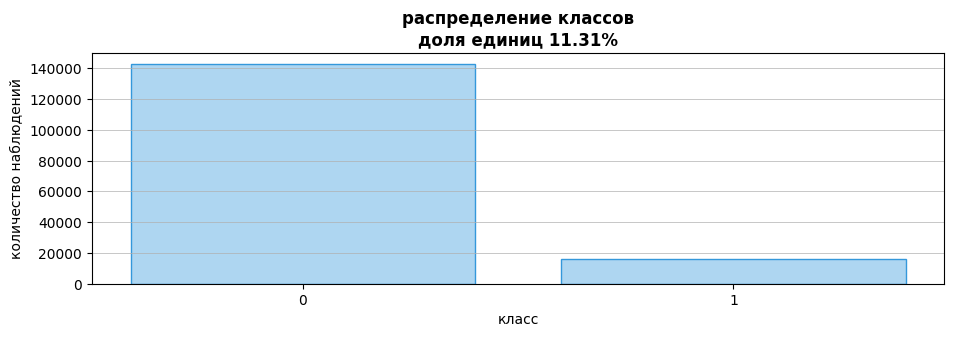

In [11]:
class_distribution_plot(df)

Единиц всего 11%, скорее всего это те самые токсичные комментарии, которые нам предстоит научиться находить. Для полной уверенности выведем несколько из них и почитаем:

In [12]:
df[df.toxic == 1].head()

,text,toxic
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
12,"Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, ...",1
16,"Bye! \n\nDon't look, come or think of comming back! Tosser.",1
42,"You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do...",1
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1


Ну вот теперь мы точно уверены, что 1 - токсичные комментарии. Даже стало интересно, чем же таким торгует «Викишоп»))

_____

Отрежем небольшой кусок данных для эмбеддингов. К сожалению, больше 9000 наблюдений взять не получается, так как есть технические ограничения и спустя 5-6 часов обсчёта данных железо помирает и вся сгенерированная информация сбрасывается. Но для исследования 9000 строк должн хватить.

Разделим данные на тренировочную и тестовую выборки с применением стратификации при разбиении, это позволит нам сохранить баланс классов в каждой выборке.

Проверим получившиеся размеры:

In [13]:
X_train, X_test, y_train, y_test, X_temp, y_emb = get_train_test(df, _save=False)

доля тестовой выборки: 25%
доля единиц в train: 11.31%
доля единиц в test: 11.31%
размеры:
	X_train.shape=(119469, 1)
	y_train.shape=(119469,)
	X_test.shape=(39823, 1)
	y_test.shape=(39823,)

на эмбеддинги выделено 9000 строк, это 8% от X_train


_____

Для дальнейшей работы с текстом нам необходимо его подготовить. Мы используем два способа: 

1. **сформируем эмбеддинги** - токенизируем признаки и вычислим эмбеддинги при помощи предобученной модели ```BERT```. Проверим, насколько небольшая выборка из эмбеддингов будет конкурентна в обучении и предсказании
2. **сформируем корпус текстов** - уберём лишнее и оставим нужное, токенизируем, лемматизируем и трансформируем при помощи алгоритма ```TF-IDF``` 

Начнём:

In [14]:
# можно не ждать многочасов и скачать готовый результат:
X_train_emb = download_from_link(
    'https://drive.google.com/uc?export=download&id=1w-Z1cgjQ69bn9JVl1S8k9u00r9G1Cio0',
    'X_train_embeddings.pickle')

успех! файл X_train_embeddings.pickle загружен в переменную!


In [15]:
# # а если есть свободных 5-6 часов, то вот:
# X_train_emb = get_embeddings(X_temp['text'], batch_size=150) 

Эмбеддинги готовы, сохраним их и их таргет на всякий случай в файл:

In [16]:
# save_or_download_file(X_train_emb, 'X_train_embeddings')

**Теперь обработаем данные для ```TF-IDF```-трансформации:**

Проверим на одном примере, что будет получаться после всех трансформаций на выходе:

In [17]:
num = 0
X_train_corpus = list(X_train['text'])
print(f'Исходный текст:\n{X_train_corpus[num]}\n\n'
      f'Очищенный и лемматизированный текст:\n{preprocess_and_tokenize_text(X_train_corpus[num])}')

Исходный текст:
IT IS OBVIOUS YOU DO NOT GIVE A CRAP ABOUT ACTUALLY HAVING A NEUTRAL ENCYCLOPEDIA OR BOTHERING TO CHECK THE FUCKING SOURCES.

Очищенный и лемматизированный текст:
obvious give crap actually neutral encyclopedia bother check fuck source


Результат подходящий, для его получения мы использовали библиотеку для работы с естественным языком ```nltk```, а из неё:
- модуль с набором констант символов ASCII ```string``` 
- список английских стоп-слов
- функцию для разбивки текстов на токены ```word_tokenize```
- класс для лемматизации ```WordNetLemmatizer``` с соответствующими POS-тегами. Он основан на лексиконе WordNet и может лемматизировать слова разных частей речи (существительные, глаголы, прилагательные и наречия), приводя их к базовой форме.

Лемматизируем все имеющиеся у нас тексты, но в разных потоках кеша, чтоб не было подглядывания в отложенную выборку:

In [18]:
# эта процедура, если что, занимает чуть меньше 5-ти минут, готовые файлы  
# довольно тяжелые и скачиваются дольше, чем обсчитываются "на лету", так что лучше подождать:
cached_lemmas_train = {}
X_train['lemm_text'] = X_train['text'].progress_apply(
    lambda x: preprocess_and_tokenize_text(x, cached_lemmas_train))

cached_lemmas_test = {}
X_test['lemm_text'] = X_test['text'].progress_apply(
    lambda x: preprocess_and_tokenize_text(x, cached_lemmas_train))

  0%|          | 0/119469 [00:00<?, ?it/s]

  0%|          | 0/39823 [00:00<?, ?it/s]

Посмотрим на результат лемматизации:

In [19]:
X_train.head(3)

,text,lemm_text
119339,IT IS OBVIOUS YOU DO NOT GIVE A CRAP ABOUT ACTUALLY HAVING A NEUTRAL ENCYCLOPEDIA OR BOTHERING TO CHECK THE FUCKING ...,obvious give crap actually neutral encyclopedia bother check fuck source
116426,"Note also that the policy does not say to avoid using the word terrorist, but to avoid describing people are terrori...",note also policy say avoid use word terrorist describe people fine give quotation accusation third party
56586,"He has shown us the connection between AA and BS. Put it in, Rbaish. And deeceevoice, before you dismiss discrimi...",show u connection aa b put rbaish deeceevoice dismiss discrimination sport consider rest business world much desire ...


Отлично, тексты лемматизировали. Полученные результаты со столбцами "было-стало" на всякий случай запишем по файлам, а потом снесём старый столбец:

In [20]:
X_train = X_train.drop('text', axis=1)
X_test = X_test.drop('text', axis=1)

Создадим корпуса слов:

In [21]:
corpus_train = list(X_train['lemm_text'])
corpus_test = list(X_test['lemm_text'])

Применим ```TF-IDF```:

In [22]:
vect = TfidfVectorizer()

X_train_tfidf = vect.fit_transform(corpus_train)
X_test_tfidf = vect.transform(corpus_test)

In [23]:
# # вот они: 
# X_train_tfidf = download_from_link(
#     'https://drive.google.com/uc?export=download&id=1XQJWnzs24kocYeHIL_OO96a_LHtSIG3b',
#     'X_train_tfidf.pickle')
# X_test_tfidf = download_from_link(
#     'https://drive.google.com/uc?export=download&id=1rTuvM2fcR1RMuOWrxug1rMiiV3lwj7K1',
#     'X_test_tfidf.pickle')

Сохраним в файлы:

In [24]:
# save_or_download_file(X_train_tfidf, 'X_train_tfidf')
# save_or_download_file(X_test_tfidf, 'X_test_tfidf')

И посмотрим на графике на то, что мы там налемматизировати и натээфидээфили, применив для этого SVD-матричное разложение из метода ```TruncatedSVD```. Этот метод отлично подходит для визуализации разреженных матриц, давая возможность сокращения компонент:

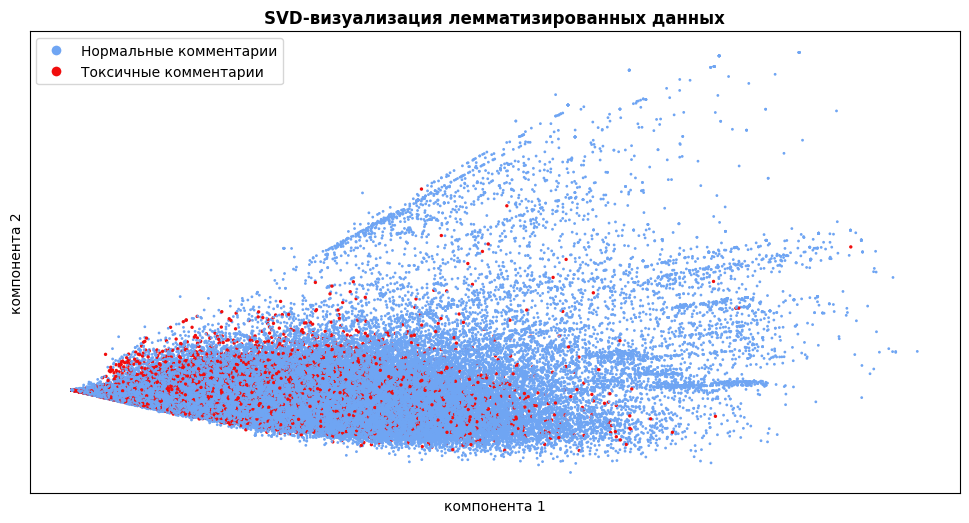

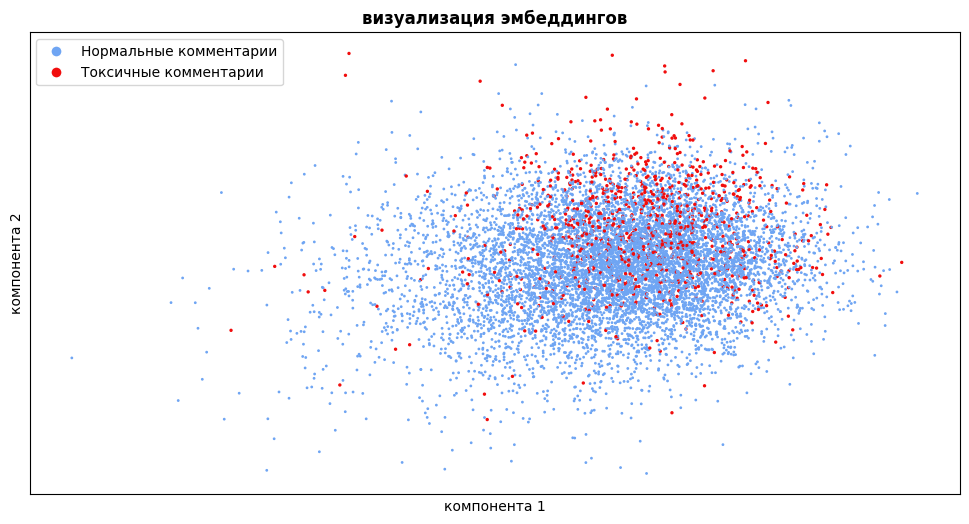

In [25]:
svd_scatter(X_train_tfidf)
embedding_scatter(X_train_emb, y_emb)

Получили что-то такое абстрактное и довольно творческое. Из графиков можно сделать предположение о том, что:
- токсичные комментарии в интернет-магазине «Викишоп» вряд ли относятся к какой-то одной категории товаров, скорее всего они довольно равномерно распределены среди всех комментариев. Тут бы в целом о воспитании населения задуматься и культуре его общения, но вряд ли подобное направление мысли в короткой перспективе поможет интернет-торговле
- зато уже сейчас точеная SVD-визуализация помогает нам понять то, что алгоритмы машинного обучения, основанные на деревьях (лес и бустинги) из-за того, что столкнутся со сложным многовекторным пространством, в котором нет какой-то четко выделяемой кластеризации, будут долго нарезать его на терминальные узлы. Скорее всего, они окажутся самыми долгими и сильно переобученными
- мы, разумеется, рассмотрим и алгоритм леса и бустинг как традиционно одни из самых сильных альгоритмов машинного обучения, но в силу ограниченности технических возможностей для разработки модели и сложности имеющихся у нас данных не остановимся на них и опробуем так же пару линейных алгоримов:

##### Предварительный вывод. На данном этапе мы:

- сформулировали задачу и определили шаги её решения
- скачали и подготовили данные для машинного обучения, используя два метода:
  - TF-IDF-векториязацию данных
  - создание эмбеддингов на основе имеющихся данных
- в поисках явной кластеризации визуализировали в двумерном пространстве имеющиеся у нас данные, это позволило нам примерно определиться с тем, от какого алгоритма какого поведения ожидать.

В целом данные лемматизиованы, трансформированы и готовы к передаче алгоритмам машинного обучения

_____

## Обучение

Переберём несколько ML-алгоритмов с параметрами, подобранными при помощи ```RandomizedSearchCV```, посчитаем на тренировочных данных на кросс-валидации метрики и соберём результаты и обученные модели в единую структуру-список ```pipeline_and_predicts_list```, после из них потом будет выбирать "победителя", обращаясь к нему по идексу:

In [26]:
# pipeline_and_predicts_list = list()

Для одного алгоритма с одной и той же сеткой гиперпараметров последовательно передадим TF-IDF-выборку и созданные эмбеддинги.

### Logistic Regression (логистическая регрессия)

Это линейный метод классификации, который использует логистическую функцию для предсказания вероятности принадлежности объекта к определенному классу, основанные на линейной комбинации признаков и их весов.

переберём параметры:
- ```С``` - обратный коэффициент регуляризации, контролирующий, насколько сильно модель будет штрафовать за большие значения весов признаков
- ```tol``` - критерий останова алгоритма, определяющий минимально допустимое значение при сравнении двух последних итераций (сравнивается Евклидово расстояние между векторами весов)
- ```intercept_scaling``` - масштабирование интерсепта. По умолчанию значение = 1, при котором свободный член не масштабируется
- ```class_weight``` - вес классов. Попробуем:
  - None - дефолтный параметр без изменений
  - balanced - баланс классов 
  - {0:1, 1:4} и {0:1, 1:6} - по разному поприбавляем веса токсичным комментариям

In [27]:
# %%time
# model = LogisticRegression()
# params = {
#     'classifier__C': [.01, .1, 1, 10, 100],
#     'classifier__tol': [1e-4, 1e-5, 1e-6],
#     'classifier__intercept_scaling': [.5, 1, 1.5, 2],
#     'classifier__class_weight': [{0:1, 1:4}, {0:1, 1:6}, 'balanced', None],
# }

# make_prediction(model, params, X_train_emb, y_emb, X_train_tfidf, y_train)

![LogisticRegression.jpg](https://ltdfoto.ru/images/2023/07/01/LogisticRegression.jpg)

### LinearSVC (линейный метод опорных векторов)

Этот метод строит гиперплоскость в многомерном пространстве для разделения объектов разных классов. Он оптимизирует функцию потерь, минимизируя отступы между классами и максимизируя расстояние до ближайших объектов.

Для него переберём параметры:
- ```C``` - обратный коэффициент регуляризации
- ```max_iter``` - максимальное количество итераций
- ```penalty``` - тип регуляризации 
  - L1 (Lasso) 
  - L2 (Ridge)
- ```dual``` - выбор прямой или двойственной формулировки задачи оптимизации

In [28]:
# %%time
# model = LinearSVC()
# params = {
#     'classifier__C': [.1, 1, 10],
#     'classifier__max_iter': [1000, 10000, 20000],
#     'classifier__penalty': ['l1', 'l2'],
#     'classifier__dual': [True, False]         
# }
# make_prediction(model, params, X_train_emb, y_emb, X_train_tfidf, y_train)

![LINEAR.jpg](https://ltdfoto.ru/images/2023/07/01/LINEAR.jpg)

### XGBClassifier (стохастический градиентный спуск)

Стабильный и надёжный градиентный бустинг от компании DMLC. Он считается одним из самых быстрых, поэтому-то его и попробуем.

Переберём параметры:
- ```n_estimators``` - количество деревьев в ансамбле
- ```max_depth``` - максимальная глубина каждого дерева
- ```learning_rate``` - скорость обучения 
- ```subsample``` - доля подвыборки для обучения каждого дерева 
- ```colsample_bytree``` - доля признаков для обучения каждого дерева

In [29]:
# %%time
# model = XGBClassifier()
# params = {
#     'classifier__n_estimators': [100, 200, 300],
#     'classifier__max_depth': [3, 5, 7],
#     'classifier__learning_rate': [.1, .01, .001],
#     'classifier__subsample': [.8, .9, 1.0],
#     'classifier__colsample_bytree': [.8, .9, 1.0]        
# }
# make_prediction(model, params, X_train_emb, y_emb, X_train_tfidf, y_train)

![XGBClassifier.jpg](https://ltdfoto.ru/images/2023/07/01/XGBClassifier.jpg)

### Random Forest (случайный лес)

Ансамблевый метод, который объединяет несколько деревьев для принятия решения. Каждое дерево обучается на случайной подвыборке данных и случайном наборе признаков и затем результаты всех деревьев усредняются для получения окончательного предсказания.

Для леса рассмотрим:
- ```n_estimators``` - количество деревьев в лесу
- ```max_depth``` - максимальная глубина деревьев
- ```min_samples_split``` - минимальное количество образцов, необходимое для разделения узла
- ```min_samples_leaf``` - минимальное количество образцов, необходимое для образования листа
- ```max_features``` - максимальное количество признаков для каждого разделения

In [30]:
# %%time
# model = RandomForestClassifier()
# params = {
#     'classifier__n_estimators': [100, 200, 300],
#     'classifier__max_depth': [None, 5, 10],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__min_samples_leaf': [1, 2, 4],
#     'classifier__max_features': ['sqrt', 'log2', 'auto']         
# }
# make_prediction(model, params, X_train_emb, y_emb, X_train_tfidf, y_train)

![RandomForesrClassifier.jpg](https://ltdfoto.ru/images/2023/07/01/RandomForesrClassifier.jpg)

Сохраним результат в файл:

In [31]:
# final_pivot_table = GetFinalTable.pivot_table
# save_or_download_file(pipeline_and_predicts_list, 'pipeline_and_predicts_list')
# save_or_download_file(final_pivot_table, 'final_pivot_table')

In [32]:
# cкачать готовый результат:
final_pivot_table = download_from_link(
    'https://drive.google.com/uc?export=download&id=1Jqq_ILGGYL_e4FfoZg8DFJfi8O4KB3eu',
    'final_pivot_table.pickle')

успех! файл final_pivot_table.pickle загружен в переменную!


Вот что получилось:

,данные,модель,Precision,Recall,F1 на train
1,tfidf,"LogisticRegression(C=1, class_weight={0: 1, 1: 4}, intercept_scaling=1.5,\n tol=1e-06)",0.85,0.91,0.78
3,tfidf,"LinearSVC(C=1, dual=False, max_iter=10000)",0.97,0.91,0.77
5,tfidf,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode...",0.96,0.67,0.73
0,embeddings,"LogisticRegression(C=0.1, intercept_scaling=2)",0.87,0.66,0.69
2,embeddings,"LinearSVC(C=0.1, dual=False, max_iter=10000, penalty='l1')",0.89,0.66,0.68
7,tfidf,"RandomForestClassifier(max_features='sqrt', min_samples_split=10)",1.00,0.95,0.67
4,embeddings,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode...",1.00,0.98,0.64
6,embeddings,"RandomForestClassifier(max_features='sqrt', min_samples_split=10)",1.00,0.91,0.41


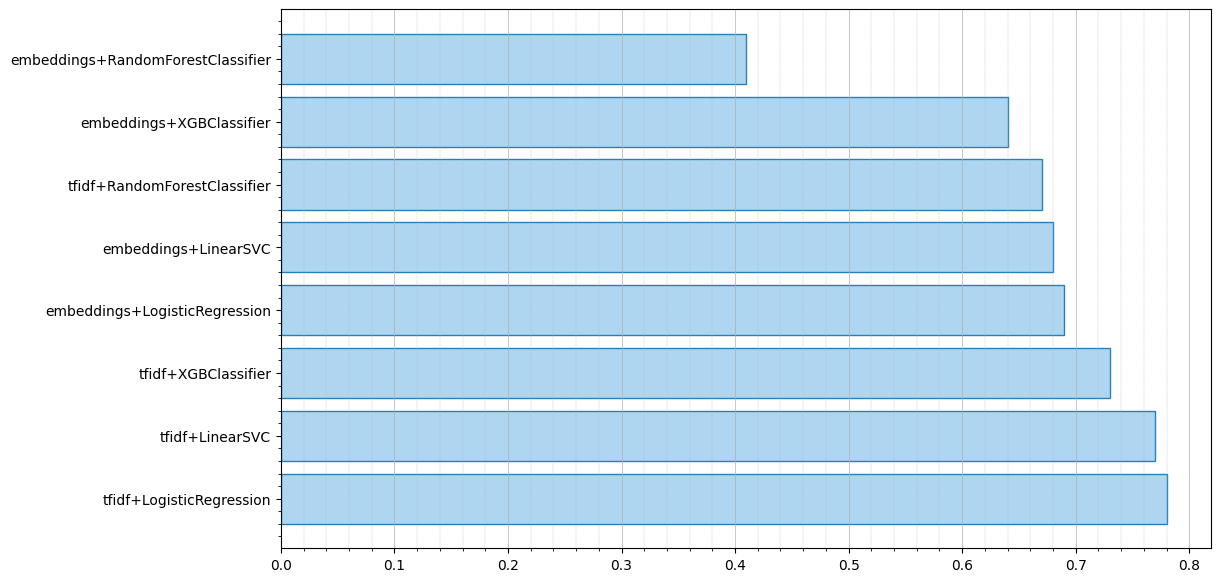

In [33]:
bar_ = final_pivot_table.drop(columns='F1 на test').sort_values('F1 на train')[::-1].round(2)
display(bar_)
get_bar(bar_['данные']+'+'+bar_['модель'], bar_['F1 на train'], '', '', '', h=True)

Интересный результат: 
- видно, что преобразованные при помощи TF-IDF-данные отработали лучше, чем эмбеддинги, при этом эмбеддинги, несмотря на то, что мы их сформировали всего из 8% данных X_train, тоже показали довольно приличные результаты, но всё же недостаточные для прохождения минимально заданного порога в F1 >= 0.75
- эмбеддинги однозначно отработали бы лучше, будь их больше, но, к сожалению, мы ограничены техническими характеристиками той вычислительной техники, которая есть в нашем распоряжении, а эта техника стустя несколько часов работы стабильно "помирает" при прибавлении хотя бы одного процента к данным. Поэтому, увы, имеем дело с тем, с чем имеем
- линейные алгоритмы среди всех показали самые лучшие результаты, деревянные же обсчитывались долго, а результат вернули хуже
- при этом у всех алгоритмов высокие значенич Precision и Recall, однако усреднённое значение F1, полученное при помощи кросс-валидации на трёх фордах, ощутимо ниже Precision и Recall, что сигнализирует в том числе и о переобучении алгоритмов

##### Предварительный вывод. На данном этапе мы:

- подготовили несколько моделей машинного обучения 
- проверили их работу по ряду метрик классификации, ориентируясь в первую очередь, за значения метрики F1, полученные усреднением кросс-валидации на трёх фолдах
- сформировали и вывели итоговую таблицу предсказаний алгоритмов, отсортировав их по убыванию метрики F1

На основании полученных результатов мы определились с лидирующим алгоритмом, на котором будем проверять отложенную выборку - им оказалась линейная регрессия, обученная на тренировочнй выборке, лемматизированной и обработанной при помощи алгоритма TF-IDF

_____

## Проверим выбранный алгоритм на отложенной выборке

Посмотрим на пайплайн алгоритма-победителя, это линейная регрессия на TF-IDF под индектом 1:

In [34]:
pipeline_and_predicts_list[1][2]

Pipeline(steps=[('classifier',
                 LogisticRegression(C=1, class_weight={0: 1, 1: 4},
                                    intercept_scaling=1.5, tol=1e-06))])

Получим предсказание:

,модель,Precision,Recall,F1 на test
0,"LogisticRegression(C=1, class_weight={0: 1, 1: 4}, intercept_scaling=1.5,\n tol=1e-06)",0.78,0.79,0.79


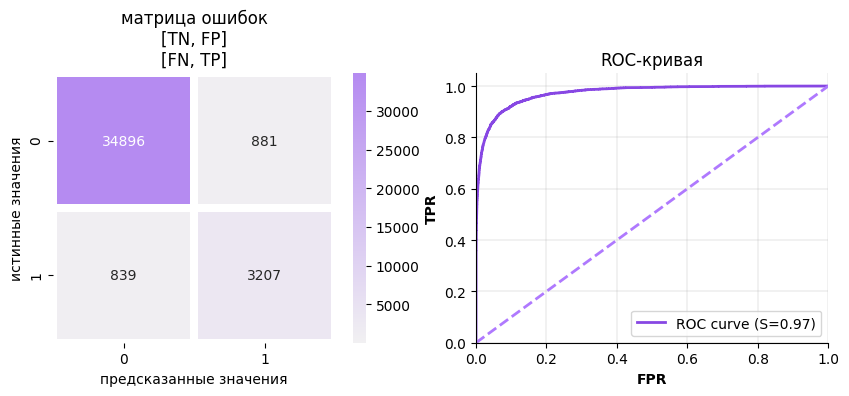

In [35]:
pred = choosing_best_model('', pipeline_and_predicts_list[1][2], '', '','', X_test=X_test_tfidf, y_test=y_test)
GetFinalTable.pivot_table[['модель', 'Precision', 'Recall', 'F1 на test']].iloc[[-1]].round(2)

Выбранная нами модель довольно точно классифицировала токсичные комментарии и в этомя виден очевидный признак её хорошей производительности, F1 = 0.79 говорит о том, что модель держит баланс между точностью (Precision) и полнотой (Recall), значения самих же Precision, Recall и площади под ROC-кривой подтверждают это.

Для того, чтоб окончательно убедиться в том, что наша модель действительно предсказывала, а не занималась угадайкой, сравним её с константной моделью классификации, работающей по стратегии *stratified*. Такая модель предсказывает значения целевой переменной с учетом распределения классов в обучающем наборе данных и случайным образом выбирает классы с вероятностями, пропорциональными их частоте. Она как раз отлично подходит для оценки производительности модели на несбалансированных данных, а наши данные именно такие:

,модель,значение F1
0,разработанная модель,0.788542
1,dummy-модель,0.103371


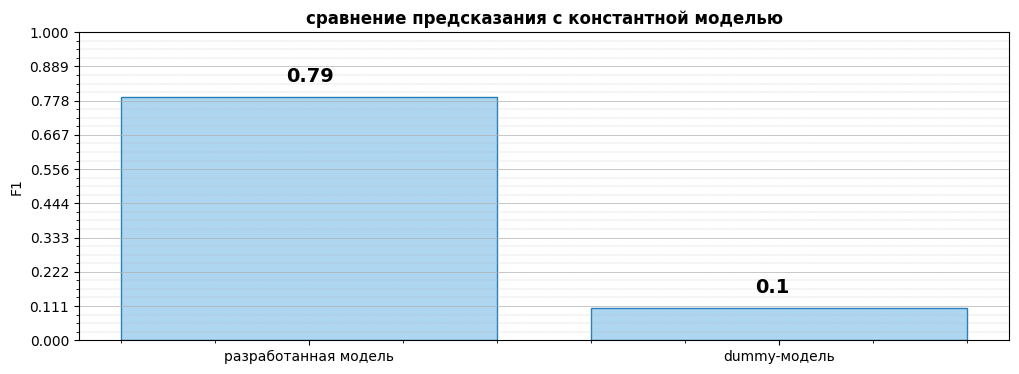

In [36]:
np.random.seed(RANDOM_STATE)
f1_dummy = f1_score(y_test, DummyClassifier(strategy='stratified').fit(X_train_tfidf, y_train).predict(X_test_tfidf))
temp_df = pd.DataFrame({'модель': ['разработанная модель', 'dummy-модель'], 
                       'значение F1': [GetFinalTable.pivot_table[['F1 на test']].iloc[[-1]].values[0][0], f1_dummy]})
display(temp_df)
get_bar(temp_df['модель'], temp_df['значение F1'], '', 'F1', 
        'сравнение предсказания с константной моделью', f1_=temp_df['значение F1'].values)

По полученному значению F1-метрики мы видим, что полученное нашей моделью предсказание на отложенной выборке является достаточно высоким и это указывает на то, что модель хорошо справляется с классификацией токсичных комментариев, достигая баланса между точностью и полнотой и минимизируя количество ложноположительных и ложноотрицательных предсказаний, а значит старались мы не зря и нам есть что предложить интернет-магазину «Викишоп»

_____

## Подведём итог проделанной работе

Для интернет-магазина «Викишоп» мы разработали модель машинного обучения, которая находит токсичные комментарии и отправляет их на модерацию.

Для создания модели нами были проделаны следующие шаги:

- обработаны предоставленные данные при помощи двух разных техник:
  - чистка текста при помощи соответствующих модулей и библиотек и дальнейшая трансформация обработанного текста при помощи TF-IDF алгоритма
  - формирование на основе 8% текста эмбеддингов и обучение модели на них
- подготовлены разные виды моделей машинного обучения на базе таких алгоритмов:
  - 2 линейных:
    - Logistic Regression (логистическая регрессия)
    - LinearSVC (линейный метод опорных векторов)
  - 2 деревянных:
    - XGBClassifier (стохастический градиентный спуск)
    - Random Forest (случайный лес)
- выбрана модель, показавшая лучшие значения по метрике F1, представляющей собой гармоническое среднее между полнотой предсказания и его точностью.

Что могло помешать исследованию:
- в первую очередь технические характеристики имеющихся в нашем распоряжении устройств, которые не позволили сформировать достаточное количество эмбеддингов на основании имеющихся в нашем распоряжении данных, так как даже на базе имеющихся, сформированных всего на 8% тренировочнй выборки, мы получили довольно хороший результат
- стиль обнаруженных "токсичных комментариев" - стоит подробнее уточнить у компании-заказчика профиль их бизнеса, данная информация детальнее характеризовала бы покупателя, его психологический портрет, вкусы и предпочтения. Это, в свою очередь, позволило бы определить границу того, что есть "токсичный" комментарий, более чётко. Дополнительная информация о вкусах и предпочтениях покупателей может помочь лучше классифицировать комментарии. А пока, исходя из содержания увиденных комментариев, единственное, что мы можем сказать наверяка, это то, что интернет-магазин «Викишоп» точно не занимается продажей детских товаров))

Исходя из полученных результатов, можно сделать вывод о том, что разработанная нами модель является эффективной и может быть использована компанией «Викишоп» для поиска плохих комментариев. Она станет важным инструментом для компании и позволит не только оптимизировать имеющиеся бизнес-процессы, но и повысить уровень обслуживания клиентов в целом.

_____